In [2]:
import numpy as np
import numpy.fft as fp
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal as sg
import sys
sys.path.append("/home/tintin/rongheng/cv/")
from imtools import *
from edge_detection import *

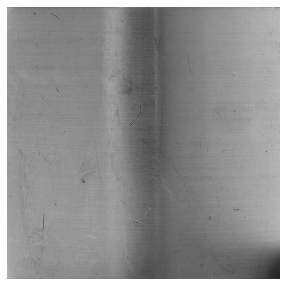

In [6]:
img = load_img("bearing_scrached_fuji_tunnel.jpg")
show_img(img)

## Blur (Average)

In [25]:
box = np.ones((3,3)) / 9

$$ 
g_x = 
\frac{1}{9}\cdot
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

In [26]:
blurred_img = sg.convolve(img, box, "valid")

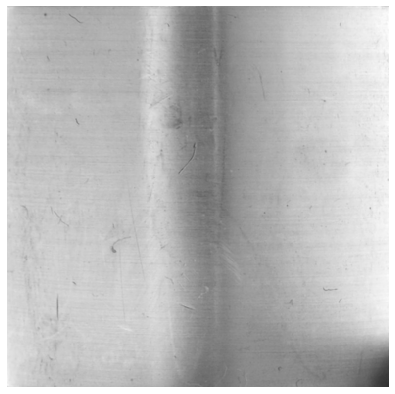

In [27]:
plt.figure(figsize=((7,7)))
plt.imshow(norm(blurred_img), cmap='gray', vmin=0, vmax=255), plt.axis('off')
save_as_img(blurred_img, 'result_images/block_blur.jpg')

### Gaussian Blur

$$
g_{approx} =
\frac{1}{16}
\cdot
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}
$$

In [28]:
gauss = np.array([[1,2,1],
                  [2,4,2],
                  [1,2,1]]) / 16

In [29]:
gauss = gaussian_kernel(3,0.84089642, normalised=True)
print((gauss*16).round())

[[1. 2. 1.]
 [2. 4. 2.]
 [1. 2. 1.]]


In [30]:
blurred_img = sg.convolve(gauss, img, 'valid')

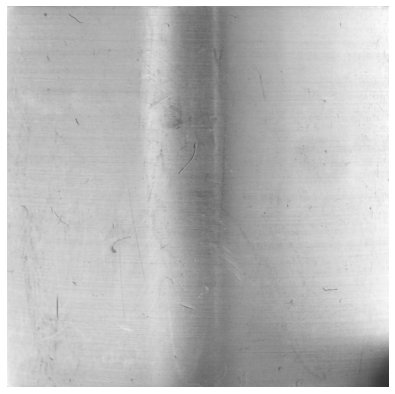

In [31]:
plt.figure(figsize=((7,7)))
plt.imshow(norm(blurred_img), cmap='gray', vmin=0, vmax=255), plt.axis('off')
save_as_img(blurred_img, 'result_images/gauss_blur.jpg')

## Sharpening

$$ g_x =
\begin{bmatrix}
0  & -1 &  0 \\
-1 &  5 & -1 \\
0  & -1 &  0
\end{bmatrix}
$$

In [41]:
sharpen = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])

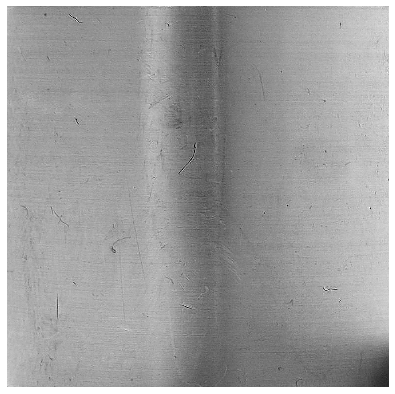

In [42]:
sharpend_img = sg.convolve(sharpen, img, 'valid')
plt.figure(figsize=((7,7)))
plt.imshow(norm(shaprend_img), cmap='gray', vmin=0, vmax=255), plt.axis('off')
save_as_img(norm(shaprend_img), 'result_images/shaprend.jpg')

### Laplace edge detecion

$$ g =
\begin{bmatrix}
0 &  \ \ 1 & 0 \\
1 & -4 & 1 \\
0 &  \ \ 1 & 0
\end{bmatrix}
$$

In [32]:
lapl = np.array([[0,1,0],
                 [1,-4,1],
                 [0,1,0]])


In [33]:
lapl_edge_img = sg.convolve(vert_edg, img, 'valid')

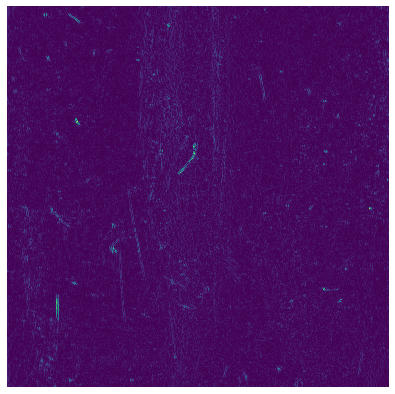

In [34]:
plt.figure(figsize=((7,7)))
plt.imshow(norm(lapl_edge_img)), plt.axis('off')
save_as_img(norm(lapl_edge_img), 'result_images/edge_lapl.jpg')

## Sobel Edge Detection
### Vertical and Hotizontal Edges

In [ ]:
# Sobel deriviative filters
img_x = np.zeros(img.shape)
filters.sobel(img, 1, img_x)

img_y = np.zeros(img.shape)
filters.sobel(img, 0, img_y)

magnitude = np.sqrt(img_x**2+img_y**2)

In [35]:
vert_edg = np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])

horr_edg = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])

In [36]:
vert_edg_img = sg.convolve(vert_edg, img, 'valid')
horr_edg_img = sg.convolve(horr_edg, img, 'valid')

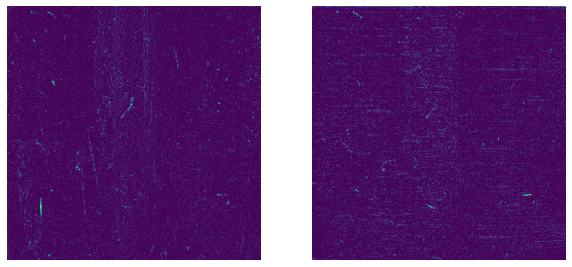

In [37]:
fig, (vert_ax, horr_ax) = plt.subplots(1,2, figsize=(10,10))
vert_ax.imshow(norm(vert_edg_img)), vert_ax.axis('off')
horr_ax.imshow(norm(horr_edg_img)), horr_ax.axis('off')

save_as_img(norm(vert_edg_img), 'result_images/edges_vert.jpg')
save_as_img(norm(horr_edg_img), 'result_images/edges_horr.jpg')

In [38]:
def gradient(vert_edg, horr_edg):
    return np.sqrt(np.power(vert_edg, 2) + np.power(horr_edg, 2))

In [39]:
gradient_edg_img = gradient(vert_edg_img, horr_edg_img)
vert_edg.shape

(3, 3)

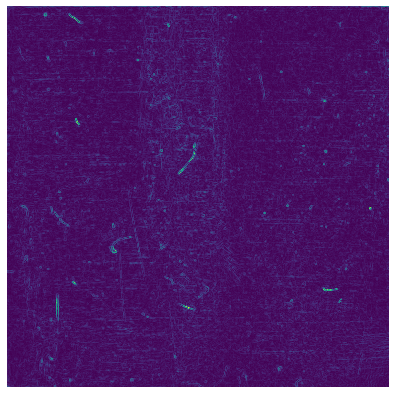

In [40]:
plt.figure(figsize=((7,7)))
plt.imshow(norm(gradient_edg_img)), plt.axis('off')
save_as_img(norm(gradient_edg_img), 'result_images/edges_gradiant.jpg')